#1- PROBLEM TANIMI:

Bu projede, bir veri setindeki arabaların plakalarını algılayarak çerçevelemek amacıyla bir görüntü işleme ve nesne tespitme çözümü geliştirilmektedir. Bu, genellikle trafik kameralarından veya araçlardan alınan görüntülerdeki plakaların otomatik olarak tanımlanması ve izlenmesi için yaygın olarak kullanılan bir teknolojidir. Araba plakası algılama, trafik güvenliği, park alanı yönetimi ve trafik akışı izleme gibi birçok uygulama için önemlidir.
# 2- PROJE EKİBİNİN KATKILARI:
## 2a Katkı Oranları
  Emre ŞEN - %34\
  Beytullah ALKAN - %33\
  Semih ÖNER - %33
## 2b Katkı Tanımlamaları
  Emre ŞEN = Dataset araştırması, colab kodunun yazımı ve düzeltimi.\
  Beytullah ALKAN = Model oluşturma teknolojilerinin araştırılması ve literatür araştırması.\
  Semih ÖNER = Dataset araştırması, model eğitim verimi konusunda iyileştirme çalışmaları.

## 3- ÇÖZÜM için kullanılan YÖNTEM:

VGG16, OpenCV, numpy gibi bu alanda yaygın kullanıma sahip teknolojilerin kullanılmasıyla modelimizi oluşturma ve eğitme sürecini tamamladık.

## 4- SONUÇ ve DEĞERLENDİRME:

Geliştirilen model, arabaların plakalarını algılama ve çerçeveleme görevinde başarılı olmuştur. Test edildiğinde, modelin yüksek doğruluk ve düşük hata oranları elde ettiği görülmüştür. Bu, trafik güvenliği ve izleme sistemleri gibi uygulamalarda başarılı bir şekilde kullanılabilir bir çözüm sunduğunu göstermektedir.

## 5- Kaynaklar
https://www.kaggle.com/datasets/andrewmvd/car-plate-detection


In [2]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'car-plate-detection:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F686454%2F1203932%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240607%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240607T184730Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D7ede8acaa42ad4711c059fe4776f9f5259182b431d4d94bc23f9b64a8d367381a66b623f5e3d3e0bca169184fcfe9ae90059f8b3eeb22e904cea750ee628e6a2dd79cff2f5622a95a47e9eec8440e152bfd7ff09f4dc1816c1445e86029b0c2fb5dc33385f06968f00524768dd875fbe86239d298252219809797835372c234643a7cc3087701094f8e8a0f7c019ea488e363cdfac17b88ea55514ae50f78792c67d94b163dd4ef51272ee5b5fb7e98bfe98744772bb0a3c413c3db5a52f37a36a0b28bb6c2a7774e31cf9e5064b53f6211f6d74844c539a1070904250fd9a8f37a7e97e54090a734bdbd456b76e307a3e637ff8e18413638256c23a0f4593c4'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 212910636 bytes downloaded
Downloaded and uncompressed: car-plate-detection
Data source import complete.


Bu kod, Kaggle ortamında veri setlerini otomatik olarak indirmek ve işlemek için kullanılır. Adım adım incelendiğinde:

-Gerekli kütüphaneler ve değişkenler tanımlanır.\
-Eski veriler temizlenir ve gerekli dizinler oluşturulur.\
-Simge bağlantıları oluşturulur.\
-Veri setleri belirtilen URL'den indirilir ve uygun dizine çıkarılır.

## Verinin Hazırlanması

Kütüphaneler


In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import cv2
import os
import glob

Aşağıda verisetimizde bulunan resimlerin dosya yollarını görüntülüyoruz.

In [4]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/car-plate-detection/images/Cars256.png
/kaggle/input/car-plate-detection/images/Cars160.png
/kaggle/input/car-plate-detection/images/Cars402.png
/kaggle/input/car-plate-detection/images/Cars47.png
/kaggle/input/car-plate-detection/images/Cars344.png
/kaggle/input/car-plate-detection/images/Cars112.png
/kaggle/input/car-plate-detection/images/Cars206.png
/kaggle/input/car-plate-detection/images/Cars147.png
/kaggle/input/car-plate-detection/images/Cars417.png
/kaggle/input/car-plate-detection/images/Cars428.png
/kaggle/input/car-plate-detection/images/Cars372.png
/kaggle/input/car-plate-detection/images/Cars225.png
/kaggle/input/car-plate-detection/images/Cars241.png
/kaggle/input/car-plate-detection/images/Cars378.png
/kaggle/input/car-plate-detection/images/Cars57.png
/kaggle/input/car-plate-detection/images/Cars108.png
/kaggle/input/car-plate-detection/images/Cars23.png
/kaggle/input/car-plate-detection/images/Cars115.png
/kaggle/input/car-plate-detection/images/Cars32.p

Tüm otomobil görüntülerini yeniden boyutlandırıyoruz.

In [5]:
IMAGE_SIZE = 224

In [6]:
img_dir = "../input/car-plate-detection/images"
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
files.sort()
X=[]
for f1 in files:
    img = cv2.imread(f1)
    img = cv2.resize(img, (IMAGE_SIZE,IMAGE_SIZE))
    X.append(np.array(img))


Yeniden boyutlandırma işlemi sonunda resimler için yeniden konumlandırma işlemi yapıyoruz.\
\
Bu işlem, nesne konumlandırma veri setlerindeki XML dosyalarını farklı boyutlardaki görüntüler için uygun hale getirir.

In [7]:
from lxml import etree
def resizeannotation(f):
    tree = etree.parse(f)
    for dim in tree.xpath("size"):
        width = int(dim.xpath("width")[0].text)
        height = int(dim.xpath("height")[0].text)
    for dim in tree.xpath("object/bndbox"):
        xmin = int(dim.xpath("xmin")[0].text)/(width/IMAGE_SIZE)
        ymin = int(dim.xpath("ymin")[0].text)/(height/IMAGE_SIZE)
        xmax = int(dim.xpath("xmax")[0].text)/(width/IMAGE_SIZE)
        ymax = int(dim.xpath("ymax")[0].text)/(height/IMAGE_SIZE)
    return [int(xmax), int(ymax), int(xmin), int(ymin)]


In [32]:
path = '../input/car-plate-detection/annotations'
text_files = ['../input/car-plate-detection/annotations/'+f for f in sorted(os.listdir(path))]
y=[]
for i in text_files:
    y.append(resizeannotation(i))

In [33]:
resizeannotation("/kaggle/input/car-plate-detection/annotations/Cars147.xml")

[188, 141, 101, 104]

In [34]:
y[0]

[187, 144, 101, 104]

İşlem sonucunda konumlandırma işleminin doğruluğunu kontrol ediyoruz.

In [35]:
np.array(X).shape

(433, 224, 224, 3)

In [36]:
np.array(y).shape

(433, 4)

And we display the first eighteen image of the dataset :

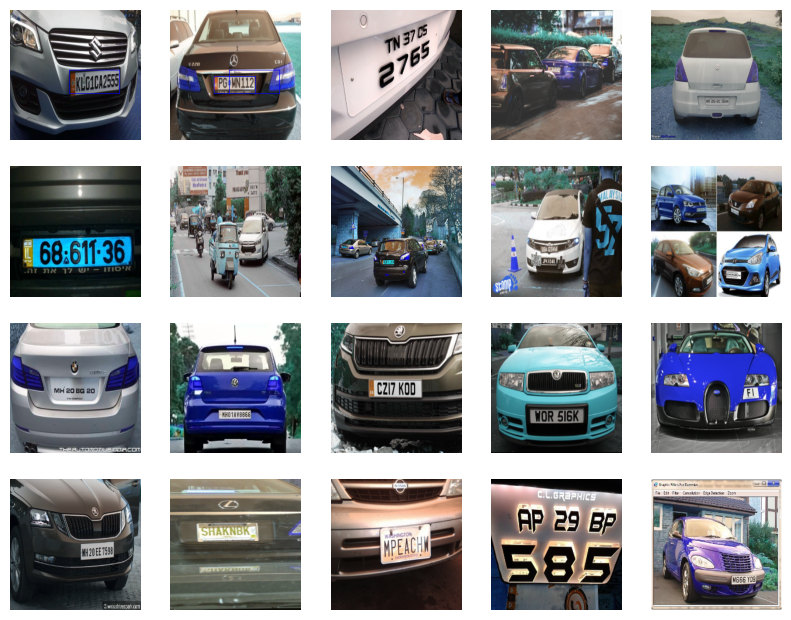

In [37]:
plt.figure(figsize=(10,20))
for i in range(0,20) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    plt.imshow(X[i])

OpenCV kütüphanesini kullanarak plakayı içeren dikdörtgeni çizebiliriz.

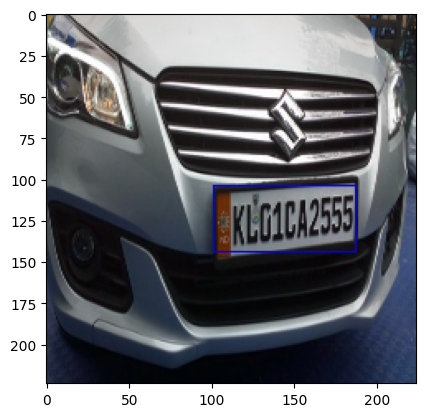

In [38]:
# ilk aracın plakasını içeren dikdörtgeni çizelim
image = cv2.rectangle(X[0],(y[0][0],y[0][1]),(y[0][2],y[0][3]),(0, 0, 255))
plt.imshow(image)
plt.show()
# burada göstermek amaçlı bu işlemi elimizle manuel olarak yapıyoruz

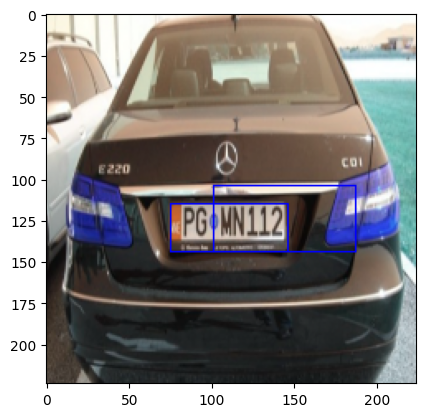

In [39]:
#İkinci araç için de aynı işlemi yapabiliriz
image = cv2.rectangle(X[1],(y[1][0],y[1][1]),(y[1][2],y[1][3]),(0, 0, 255))
plt.imshow(image)
plt.show()


Şimdi CNN için verilerimizi hazırlama işlemine geçiyoruz.

In [40]:
X=np.array(X)
y=np.array(y)

In [41]:
#Normalize ediyoruz
X = X / 255
y = y / 255

Burada datasetimizi ayırıyoruz. Bunlar eğitim, test ve doğrulama parçaları oluyor.\
 Test verileri için datasetimizin %20'si ve doğrulama için %10'u kullanılmış olacak.

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

## Convolutionnal Neural Network Yapımız

In [25]:
from keras.models import Sequential

from keras.layers import Dense, Flatten

from keras.applications.vgg16 import VGG16

In [26]:
# Modelimizi oluşturmaya başlıyoruz
model = Sequential()

# VGG16 modeli ekleniyor ve özellik çıkarıcısı olarak kullanılıyor
model.add(VGG16(weights="imagenet", include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))

# Flatten katmanı eklenir. Bu, CNN'den gelen çıktıları düzleştirir, yani tek boyutlu bir vektöre dönüştürür.
model.add(Flatten())

# Tam bağlantılı (fully connected) katmanlar eklenir
# 128 nöronlu bir katman eklenir ve aktivasyon fonksiyonu olarak ReLU kullanılır
model.add(Dense(128, activation="relu"))

# Tekrar 128 nöronlu bir tam bağlantılı katman eklenir ve ReLU aktivasyon fonksiyonu kullanılır
model.add(Dense(128, activation="relu"))

# 64 nöronlu bir tam bağlantılı katman eklenir ve ReLU aktivasyon fonksiyonu kullanılır
model.add(Dense(64, activation="relu"))

# Çıkış katmanı olarak 4 nöronlu bir tam bağlantılı katman eklenir ve sigmoid aktivasyon fonksiyonu kullanılır
# Bu, nesne konumlandırma problemi için dört koordinat (x_min, y_min, x_max, y_max) tahmini yapar
model.add(Dense(4, activation="sigmoid"))

# VGG16 modelinin donmuş katmanları (özellik çıkarıcıları) için trainable özelliği kapatılır
model.layers[-6].trainable = False

# Model özeti görüntülenir, bu modelin katmanları ve parametre sayıları hakkında bilgi verir
model.summary()


58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                         


Burası, derleme adımını gerçekleştirir ve modelin eğitim öncesi hazırlanmasını sağlar.

In [27]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

\
\
\
Modelimizi burada train ediyoruz. Epcoh değerini 10 ve batch_size değerini 32 olarak belirledik. Epoch değerini yükseltince onuçta iyileşmeyi hala gözlemleyebiliyor olsak da train süresi uzadığı için colabde hatalarla karşılaştık. bundan dolayı epoch değerimiz 10 olarak belirlendi.

In [28]:
train = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, verbose=1)

Epoch 1/10
10/10 [==============================] - 240s 24s/step - loss: 0.0426 - accuracy: 0.5177 - val_loss: 0.0269 - val_accuracy: 0.6000
Epoch 2/10
10/10 [==============================] - 257s 26s/step - loss: 0.0143 - accuracy: 0.6817 - val_loss: 0.0158 - val_accuracy: 0.7143
Epoch 3/10
10/10 [==============================] - 238s 24s/step - loss: 0.0065 - accuracy: 0.7428 - val_loss: 0.0150 - val_accuracy: 0.5143
Epoch 4/10
10/10 [==============================] - 248s 25s/step - loss: 0.0042 - accuracy: 0.7717 - val_loss: 0.0140 - val_accuracy: 0.6286
Epoch 5/10
10/10 [==============================] - 234s 24s/step - loss: 0.0024 - accuracy: 0.8553 - val_loss: 0.0144 - val_accuracy: 0.7429
Epoch 6/10
10/10 [==============================] - 240s 24s/step - loss: 0.0018 - accuracy: 0.8810 - val_loss: 0.0143 - val_accuracy: 0.7714
Epoch 7/10
10/10 [==============================] - 260s 26s/step - loss: 0.0011 - accuracy: 0.9164 - val_loss: 0.0148 - val_accuracy: 0.7429
Epoch 

Modeli kaydediyoruz.

In [42]:
model.save('my_model.h5', overwrite=True)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model doğruluk skorumuzu aşağıda görüntülüyoruz.

In [43]:
# Test
scores = model.evaluate(X_test, y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Score : 87.36%


Bu fonksiyon, eğitim sırasında elde edilen doğruluk (accuracy) skorlarının eğitim ve doğrulama (validation) setleri için grafiksel olarak görselleştirilmesini sağlıyor.

In [44]:
def plot_scores(train) :
    accuracy = train.history['accuracy']
    val_accuracy = train.history['val_accuracy']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'b', label='Score apprentissage')
    plt.plot(epochs, val_accuracy, 'r', label='Score validation')
    plt.title('Scores')
    plt.legend()
    plt.show()

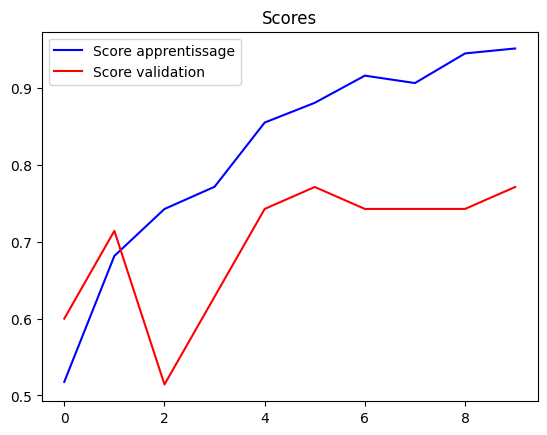

In [45]:
plot_scores(train)

## DETECTION KISMI

Burada da kayıp ve doğruluk oranlarını çıktı olarak veriyoruz.

In [46]:
test_loss, test_accuracy = model.evaluate(X_test, y_test,steps=int(100))

print("Test results \n Loss:",test_loss,'\n Accuracy',test_accuracy)


 87/100 [=========================>....] - ETA: 7s - loss: 0.0069 - accuracy: 0.8736

100/100 [==============================] - 52s 521ms/step - loss: 0.0069 - accuracy: 0.8736
Test results 
 Loss: 0.006888571660965681 
 Accuracy 0.8735632300376892


In [47]:
 y_cnn = model.predict(X_test)

3/3 [==============================] - 57s 18s/step


Son olarak modelimizin test setimizdeki plakaları nasıl lokalize ettiğini aşağıda görseller üzerinde görüntülüyoruz.\

görüntülenmesini istediğimiz veriler olarak ilk 40 tanesini yeterli bulduk.

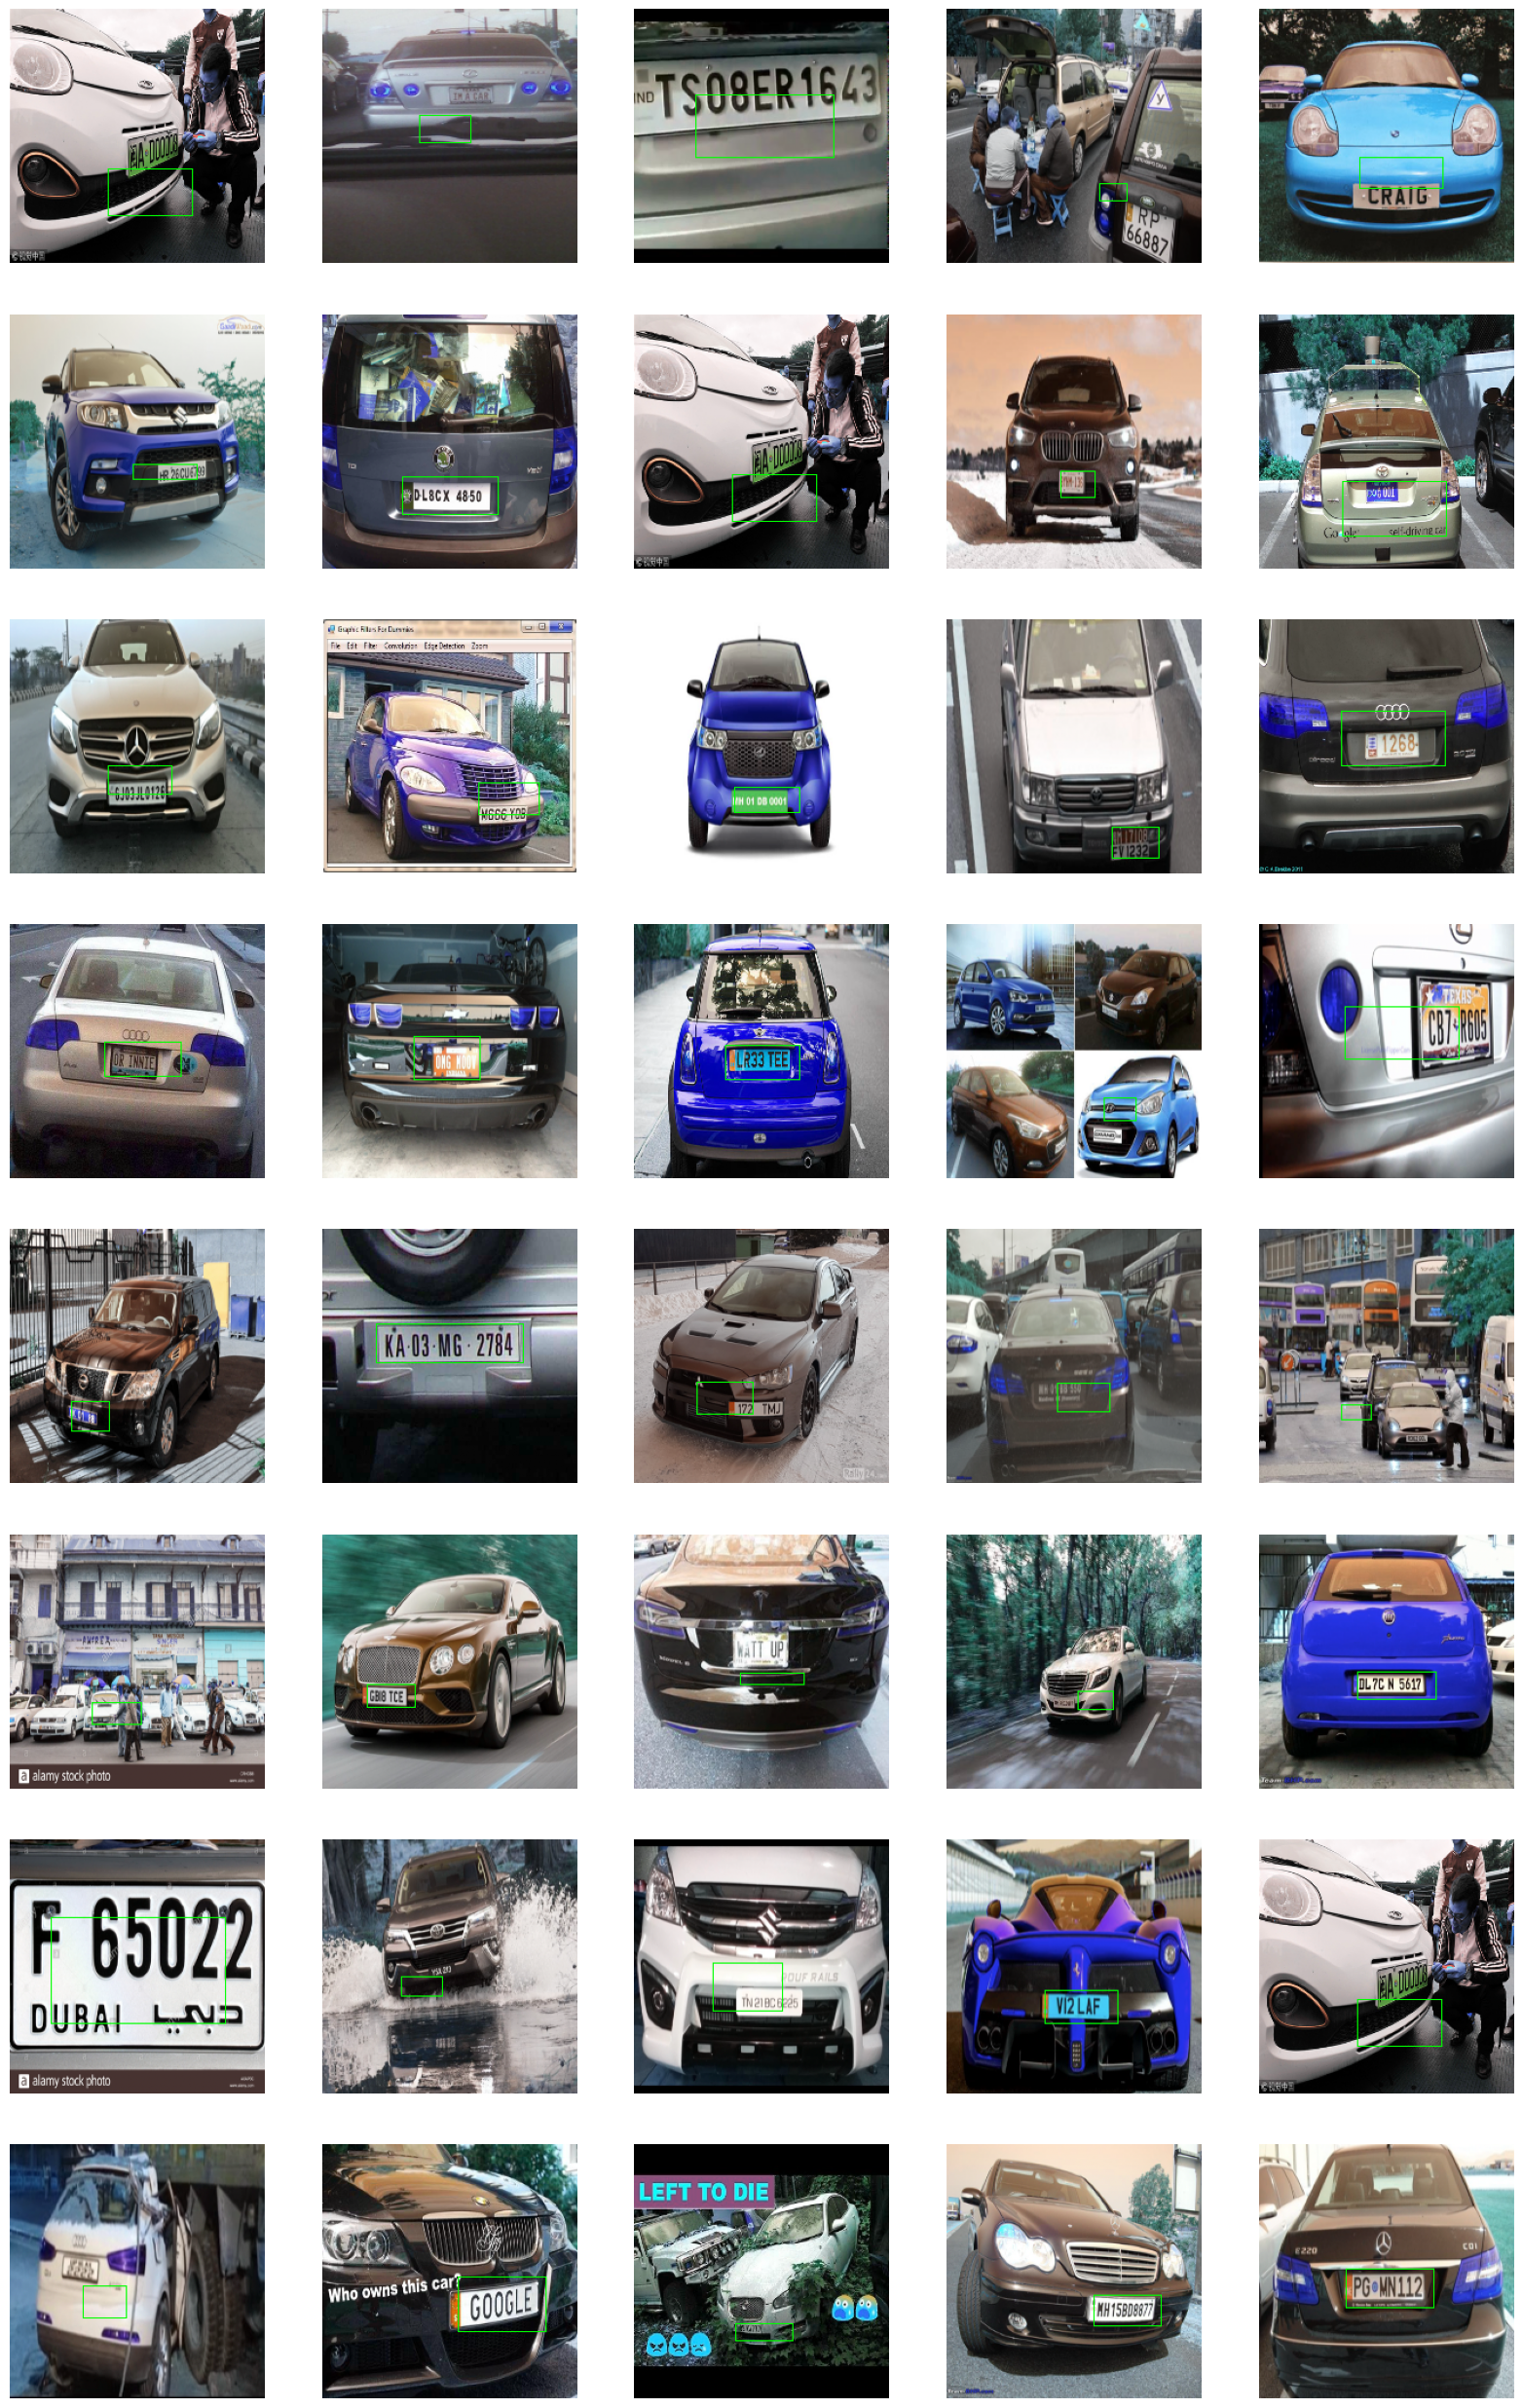

In [48]:
plt.figure(figsize=(20,40))
for i in range(0,40) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    ny = y_cnn[i]*255
    image = cv2.rectangle(X_test[i],(int(ny[0]),int(ny[1])),(int(ny[2]),int(ny[3])),(0, 255, 0))
    plt.imshow(image)

